# データの準備

In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import datetime
# 自作モデルのインポート
import models.ore_no_zenketugou_model as zenketu

In [2]:
# cifar100を利用する
data_path = './cifar-100'
# 訓練データと検証データのダウンロード
tensor_cifar100_train = datasets.CIFAR100(data_path,
                                          train=True,
                                          download=True,
                                          transform=transforms.ToTensor())
tensor_cifar100_val = datasets.CIFAR100(data_path,
                                        train=False,
                                        download=True,
                                        transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# cifar100の上位クラスのラベル
super_class_names = [
  'aquatic mammals',  # 0：水生哺乳類
  'fish',  # 1：魚
  'flowers',  # ：花
  'food containers',  # 3：食品容器
  'fruit and vegetables',  # 4：果物と野菜
  'household electrical devices',  # 5：家電
  'household furniture',  # 6：家具
  'insects',  # 7：昆虫
  'large carnivores',  # 8：大型の肉食動物
  'large man-made outdoor things',  # 9：大型の建造物
  'large natural outdoor scenes',  # 10：大自然の風景
  'large omnivores and herbivores',  # 11：大型の雑食動物と草食動物
  'medium-sized mammals',  # 12：中型の哺乳類
  'non-insect invertebrates',  # 13：昆虫ではない無脊椎動物
  'people',  # 14：人
  'reptiles',  # 15：爬虫類
  'small mammals',  # 16：小型の哺乳類
  'trees',  # 17：木
  'vehicles 1',  # 18：車両1
  'vehicles 2',  # 19：車両2
]

In [4]:
# cifar100の各ラベル
class_names = [
  'apples',  # 0：りんご
  'aquarium fish',  # 1：観賞魚
  'baby',  # 2：赤ちゃん
  'bear',  # 3：クマ
  'beaver',  # 4：ビーバー
  'bed',  # 5：ベッド
  'bee',  # 6：蜂
  'beetle',  # 7：カブトムシ
  'bicycle',  # 8：自転車
  'bottles',  # 9：ボトル
  'bowls',  # 10：ボウル
  'boy',  # 11：少年
  'bridge',  # 12：橋
  'bus',  # 13：バス
  'butterfly',  # 14：蝶
  'camel',  # 15：ラクダ
  'cans',  # 16：缶
  'castle',  # 17：城
  'caterpillar',  # 18：毛虫
  'cattle',  # 19：牛
  'chair',  # 20：椅子
  'chimpanzee',  # 21：チンパンジー
  'clock',  # 22：時計
  'cloud',  # 23：雲
  'cockroach',  # 24：ゴキブリ
  'couch',  # 25：ソファー
  'crab',  # 26：カニ
  'crocodile',  # 27：ワニ
  'cups',  # 28：カップ
  'dinosaur',  # 29：恐竜
  'dolphin',  # 30：イルカ
  'elephant',  # 31：象
  'flatfish',  # 32：ヒラメ
  'forest',  # 33：森
  'fox',  # 34：キツネ
  'girl',  # 35：少女
  'hamster',  # 36：ハムスター
  'house',  # 37：家
  'kangaroo',  # 38：カンガルー
  'computer keyboard',  # 39：コンピューターのキーボード
  'lamp',  # 40：ランプ
  'lawn-mower',  # 41：芝刈り機
  'leopard',  # 42：ヒョウ
  'lion',  # 43：ライオン
  'lizard',  # 44：トカゲ
  'lobster',  # 45：ロブスター
  'man',  # 46：成人男性
  'maple',  # 47：もみじ
  'motorcycle',  # 48：オートバイ
  'mountain',  # 49：山
  'mouse',  # 50：ねずみ
  'mushrooms',  # 51：きのこ
  'oak',  # 52：オーク
  'oranges',  # 53：オレンジ
  'orchids',  # 54：蘭
  'otter',  # 55：カワウソ
  'palm',  # 56：ヤシ
  'pears',  # 57：洋ナシ
  'pickup truck',  # 58：ピックアップトラック
  'pine',  # 59：松
  'plain',  # 60：平野
  'plates',  # 61：皿
  'poppies',  # 62：ポピー
  'porcupine',  # 63：ヤマアラシ
  'possum',  # 64：フクロネズミ
  'rabbit',  # 65：ウサギ
  'raccoon',  # 66：アライグマ
  'ray',  # 67：エイ
  'road',  # 68：道路
  'rocket',  # 69：ロケット
  'roses',  # 70：バラ
  'sea',  # 71：海
  'seal',  # 72：アザラシ
  'shark',  # 73：サメ
  'shrew',  # 74：トガリネズミ
  'skunk',  # 75：スカンク
  'skyscraper',  # 76：超高層ビル
  'snail',  # 77：カタツムリ
  'snake',  # 78：ヘビ
  'spider',  # 79：クモ
  'squirrel',  # 80：リス
  'streetcar',  # 81：路面電車
  'sunflowers',  # 82：ひまわり
  'sweet peppers',  # 83：パプリカ
  'table',  # 84：テーブル
  'tank',  # 85：タンク
  'telephone',  # 86：電話
  'television',  # 87：テレビ
  'tiger',  # 88：トラ
  'tractor',  # 89：トラクター
  'train',  # 90：電車
  'trout',  # 91：マス
  'tulips',  # 92：チューリップ
  'turtle',  # 93：カメ
  'wardrobe',  # 94：ワードローブ
  'whale',  # 95：クジラ
  'willow',  # 96：柳
  'wolf',  # 97：オオカミ
  'woman',  # 98：成人女性
  'worm',  # 99：ミミズ
]

willow


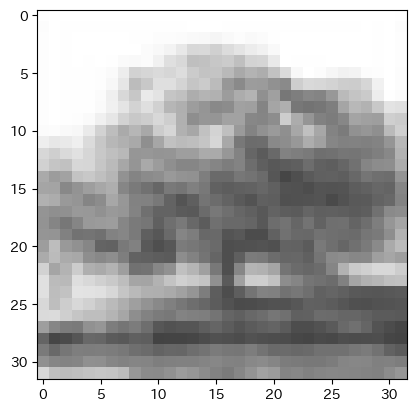

In [5]:
# 画像の確認
img_t, label = tensor_cifar100_train[11]
print(class_names[label])
plt.imshow(img_t.permute(1,2,0))
plt.show()

## 画像の標準化

In [6]:
# テンソルを束ねる
imgs = torch.stack([img_t for img_t, _ in tensor_cifar100_train], dim = 3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [7]:
# RGB各々の平均、標準偏差を計算する
means = imgs.view(3,-1).mean(dim=1)
stds = imgs.view(3,-1).std(dim=1)
means, stds

(tensor([0.5071, 0.4865, 0.4409]), tensor([0.2673, 0.2564, 0.2762]))

In [8]:
# 各画像データを標準化する
transformed_tensor_cifar100_train = datasets.CIFAR100(data_path,
                                                      train=True,
                                                      download=False,
                                                      transform=transforms.Compose([
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(means,stds)
                                                      ]))
transformed_tensor_cifar100_val = datasets.CIFAR100(data_path,
                                                   train=False,
                                                   download=False,
                                                   transform = transforms.Compose([
                                                       transforms.ToTensor(),
                                                       transforms.Normalize(means,stds)
                                                   ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


willow


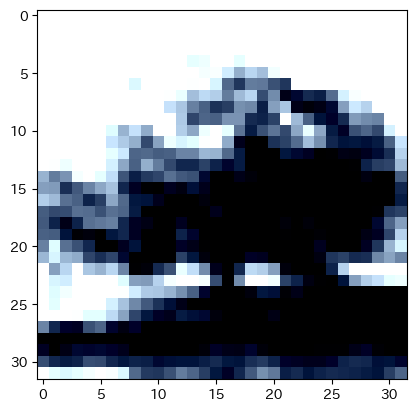

In [9]:
# 標準化後データの確認
img_t, label = transformed_tensor_cifar100_train[11]
print(class_names[label])
plt.imshow(img_t.permute(1,2,0))
plt.show()

In [10]:
transformed_imgs = torch.stack([img_t for img_t, _ in transformed_tensor_cifar100_train], dim = 3)
transformed_imgs_val = torch.stack([img_t for img_t, _ in transformed_tensor_cifar100_val], dim = 3)
transformed_imgs.shape, transformed_imgs_val.shape

(torch.Size([3, 32, 32, 50000]), torch.Size([3, 32, 32, 10000]))

In [41]:
# macのGPUが使えるか確認
# device = (torch.device('mps') if torch.backends.mps.is_available() else torch.device('cpu'))
device = 'cpu'
device

'cpu'

In [66]:
# trainデータとvalデータの正解率の確認
train_loader = torch.utils.data.DataLoader(
    transformed_tensor_cifar100_train,
    batch_size=100,
    shuffle=False)
val_loader = torch.utils.data.DataLoader(
    transformed_tensor_cifar100_val,
    batch_size=100,
    shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]: # 最初にTrain、printで結果を表示後、valを計算して結果を表示する流れ
        correct = 0
        total = 0
        with torch.no_grad(): # 勾配を計算させないのための記述
            for imgs, labels in loader:
                model.to(device='mps') # モデルをCPU上に持ってくる
                imgs = imgs.to(device='mps')
                labels = labels.to(device='mps')
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
                # 最初にtrain、後にvalの正解率を出す。
                if name == 'train':
                    train_accuracy = correct / total
                else:
                    val_accuracy = correct / total
    return train_accuracy, val_accuracy

In [13]:
# 訓練ループ
def train_loop(n_epochs, optimizer, model, loss_fn, train, val):
    loss_train_lists = np.array([])
    loss_val_lists = np.array([])
    train_accuracies = np.array([])
    val_accuracies = np.array([])
    
    device = (torch.device('mps') if torch.backends.mps.is_available() else torch.device('cpu'))
    # GPU上で訓練するのでモデルを移動。toを使う
    model.to(device=device)
    for epoch in range(1,n_epochs+1):
        loss_train = 0.0 # エポックごとにtrainとvalの損失関数を計算する
        loss_val = 0.0

        for imgs, labels in train:
            imgs = imgs.to(device=device) # 画像とラベルをGPU上へ送る
            labels = labels.to(device=device)
            outputs = model(imgs) # 訓練結果
            loss = loss_fn(outputs,labels) # 損失の計算

            optimizer.zero_grad() # 勾配の値を一旦初期化。勾配は累積される。エポック毎に累積されないようにする。
            loss.backward() # バックプロぱゲーションで勾配を計算
            optimizer.step() # 計算した勾配を基にパラメータを調整

            loss_train += loss.item()

        for val_imgs, val_labels in val:
            with torch.no_grad():
                val_imgs = val_imgs.to(device=device)
                val_labels = val_labels.to(device=device)
                val_outputs = model(val_imgs)
                val_loss = loss_fn(val_outputs, val_labels)
            loss_val += val_loss.item()

        loss_train_lists = np.append(loss_train_lists, loss_train/len(train))
        loss_val_lists = np.append(loss_val_lists, loss_val/len(val))
        
        train_accuracy, val_accuracy = validate(model, train_loader, val_loader)
        train_accuracies = np.append(train_accuracies, train_accuracy)
        val_accuracies = np.append(val_accuracies, val_accuracy)
        

        if epoch % 10 == 0 or epoch in [1,2,3]:
            print(f'{datetime.datetime.now()}Epoch:{epoch},Traing_loss:{loss_train/len(train)},val_loss{loss_val/len(val)}')
        
    return model, loss_train_lists, loss_val_lists, train_accuracies, val_accuracies

In [17]:
# 損失ではなく正解率を出す
# plt.plot(train_accuracies,label = 'train')
# plt.plot(val_accuracies, label ='val')
# plt.title('only_zenketugou_model')
# plt.ylabel('Loss')
# plt.ylim(0,1)
# plt.xlabel('epoch')
# plt.legend()
# plt.show()

In [18]:
# モデルのパラメータの保存保存
# d_path = './para_models/'
# torch.save(model.state_dict(), d_path + 'only_zenketugou_model2.pt')

In [19]:
# モデルの呼び出し
# loaded_model = zenketu.Zenketugou()
# loaded_model.load_state_dict(torch.load(d_path + 'only_zenketugou_model2.pt'))

In [20]:
# 過学習対策をしてみる
# L２正則化、バッチノーマリゼーション、ドロップアウト

# L2正則化

In [ ]:
# モデルのインスタンスの作成
model = zenketu.Zenketugou()
# パラメータの数を確認
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

In [71]:
# 訓練ループ
def train_loop_l2(n_epochs, optimizer, model, loss_fn, train, val):
    loss_train_lists = np.array([])
    loss_val_lists = np.array([])
    train_accuracies = np.array([])
    val_accuracies = np.array([])
    
    # device = (torch.device('mps') if torch.backends.mps.is_available() else torch.device('cpu'))
    # GPU上で訓練するのでモデルを移動。toを使う
    device = 'cpu'
    model.to(device=device)
    for epoch in range(1,n_epochs+1):
        loss_train = 0.0 # エポックごとにtrainとvalの損失関数を計算する
        loss_val = 0.0

        for imgs, labels in train:
            imgs = imgs.to(device=device) # 画像とラベルをGPU上へ送る
            labels = labels.to(device=device)
            outputs = model(imgs) # 訓練結果
            loss = loss_fn(outputs,labels) # 損失の計算
            
            # L2_regularization
            l2_lambda = 10
            l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
            loss = loss + l2_lambda * l2_norm
            
            # L1_regularization
            # l1_lambda = 0.001
            # l1_norm = sum(p.abs().sum() for p in model.parameters())
            # loss = loss + l1_lambda * l1_norm

            optimizer.zero_grad() # 勾配の値を一旦初期化。勾配は累積される。エポック毎に累積されないようにする。
            loss.backward() # バックプロぱゲーションで勾配を計算
            optimizer.step() # 計算した勾配を基にパラメータを調整

            loss_train += loss.item()

        for val_imgs, val_labels in val:
            with torch.no_grad():
                val_imgs = val_imgs.to(device=device)
                val_labels = val_labels.to(device=device)
                val_outputs = model(val_imgs)
                val_loss = loss_fn(val_outputs, val_labels)
            loss_val += val_loss.item()

        loss_train_lists = np.append(loss_train_lists, loss_train/len(train))
        loss_val_lists = np.append(loss_val_lists, loss_val/len(val))
        
        train_accuracy, val_accuracy = validate(model, train_loader, val_loader)
        train_accuracies = np.append(train_accuracies, train_accuracy)
        val_accuracies = np.append(val_accuracies, val_accuracy)
        

        if epoch % 10 == 0 or epoch in [1,2,3]:
            print(f'{datetime.datetime.now()}Epoch:{epoch},Traing_loss:{loss_train/len(train)},val_loss{loss_val/len(val)}')
        
    return model, loss_train_lists, loss_val_lists, train_accuracies, val_accuracies

In [67]:
# パラメータの設定
# データローダーに入れることで、簡単にデータを取り扱う
train_loader = torch.utils.data.DataLoader(
    transformed_tensor_cifar100_train,
    batch_size=100,
    shuffle=True)
val_loader = torch.utils.data.DataLoader(
    transformed_tensor_cifar100_val,
    batch_size=3,
    shuffle=False)
# 学習率の設定
learning_rate = 1e-2
# パラメータの修正に確率的勾配降下方を利用
optimizer = optim.SGD(model.parameters(), lr = learning_rate)
# 損失関数を定義
loss_fn = nn.CrossEntropyLoss()
# エポック数を設定
n_epochs = 500

In [68]:
# モデルの訓練
model,loss_train_lists, loss_val_lists,train_accuracies,val_accuracies = train_loop_l2(n_epochs = n_epochs,
                                            optimizer=optimizer,
                                            model = model,
                                            loss_fn = loss_fn,
                                            train = train_loader,
                                            val = val_loader)

2023-01-27 13:06:20.290182Epoch:1,Traing_loss:3.464915994167328,val_loss3.4628566803335787
2023-01-27 13:07:10.757565Epoch:2,Traing_loss:3.445562496185303,val_loss3.4531520345322586
2023-01-27 13:07:56.769877Epoch:3,Traing_loss:3.426475664615631,val_loss3.4453511513595316
2023-01-27 13:13:38.554369Epoch:10,Traing_loss:3.309350056171417,val_loss3.3950005248412447
2023-01-27 13:22:31.040346Epoch:20,Traing_loss:3.1747686409950258,val_loss3.3434002161133267
2023-01-27 13:30:24.967472Epoch:30,Traing_loss:3.063619891166687,val_loss3.3165416087693775
2023-01-27 13:37:17.484385Epoch:40,Traing_loss:2.968936089992523,val_loss3.2978095953237103
2023-01-27 13:43:58.597824Epoch:50,Traing_loss:2.8869097533226014,val_loss3.288054440986202
2023-01-27 13:49:51.678581Epoch:60,Traing_loss:2.8150583176612853,val_loss3.2854876967697852
2023-01-27 13:55:32.955816Epoch:70,Traing_loss:2.7529284687042237,val_loss3.2861939212413485
2023-01-27 14:01:48.450711Epoch:80,Traing_loss:2.6983035526275634,val_loss3.2923

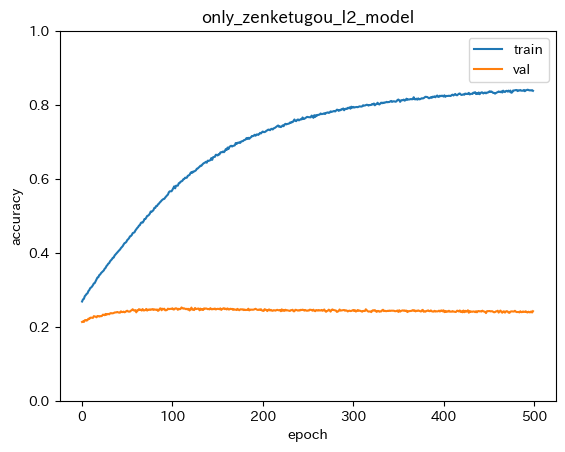

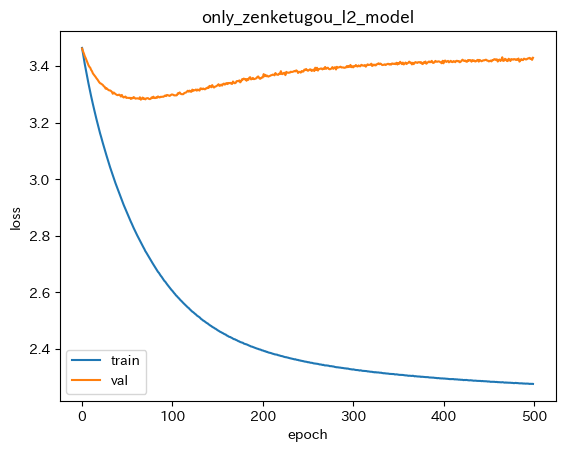

In [72]:
# 正解率を出す
plt.plot(train_accuracies,label = 'train')
plt.plot(val_accuracies, label ='val')
plt.title('only_zenketugou_l2_model')
plt.ylabel('accuracy')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.legend()
plt.savefig('picture/accuracy_smple_zenketugou_l2_0.001.png')
plt.show()
# 損失
plt.plot(loss_train_lists,label = 'train')
plt.plot(loss_val_lists, label ='val')
plt.title('only_zenketugou_l2_model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.savefig('picture/loss_smple_zenketugou_l2_0.001.png')
plt.show()